A dataset of Patient Charges is given and from this dataset a clustering model is done by the help of KMeans Clustering after preprocessing and analysing the dataset

# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.figure_factory as figf
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Importing the dataset

In [ ]:
dataset = pd.read_csv('insurance.csv')
X = dataset.iloc[:, 0:7].values

#Analysing the data

##All pairplots with all features

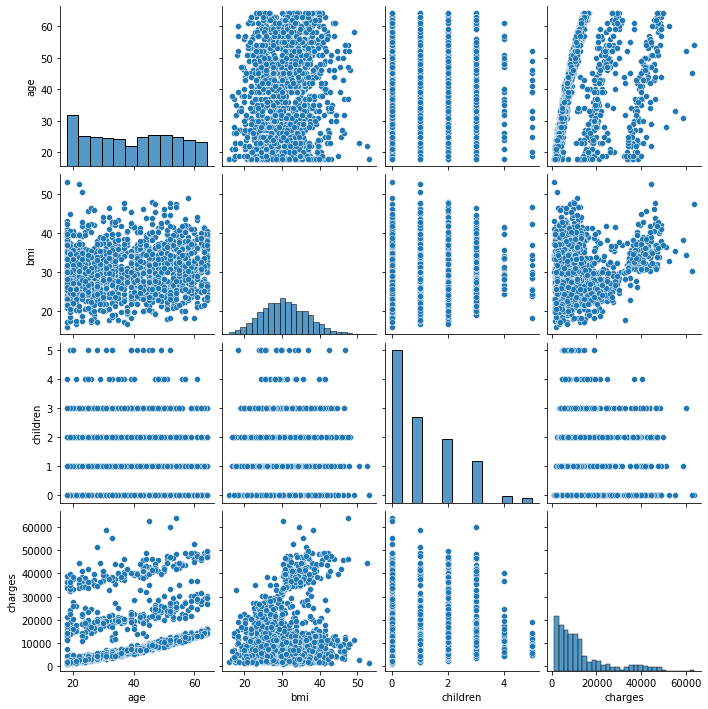

In [ ]:
sns.pairplot(dataset.iloc[:,0:7])

##All pairplots with different charges

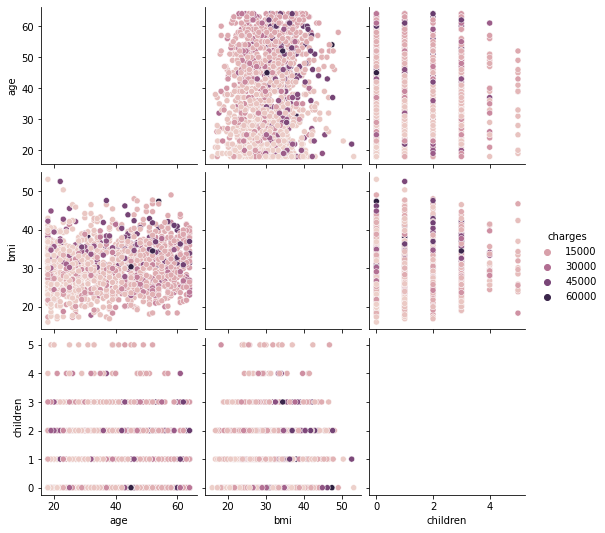

In [ ]:
sns.pairplot(dataset.iloc[:,0:7],hue='charges')

##Pairplots with smoker or not smoker

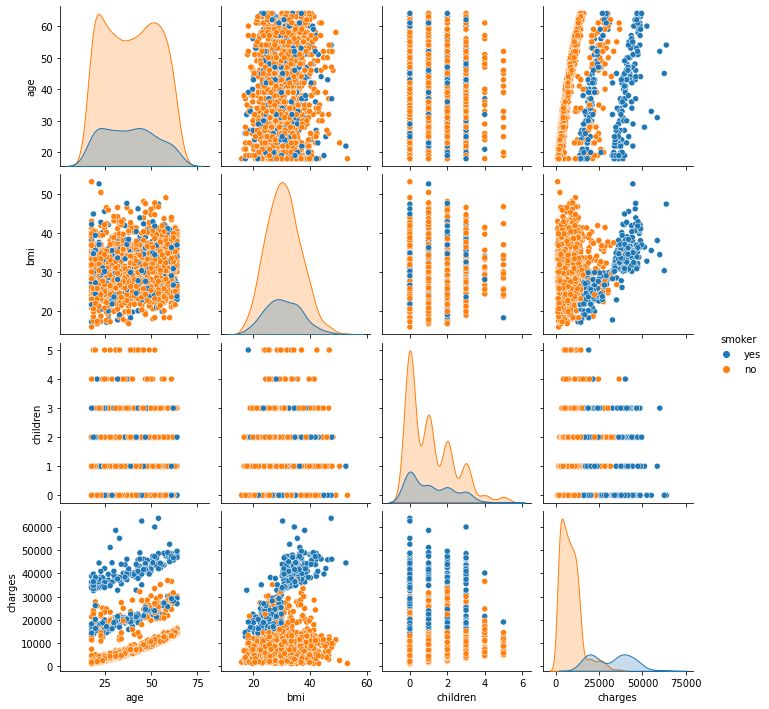

In [ ]:
sns.pairplot(dataset.iloc[:,0:7],hue='smoker')

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

##Medical charges probability distribution histogram of normal charge values and logarithmic values of charges 

In [ ]:
from plotly import tools
charge_dist = dataset["charges"].values
log_value_charge = np.log(dataset["charges"])

trace0 = gobj.Histogram(x=charge_dist,histnorm='probability',
                        name="Charges Distribution",marker = dict(color = '#FA5858',))
trace1 = gobj.Histogram(x=log_value_charge,histnorm='probability',
                        name="Charges Distribution using Log",marker = dict(color = '#58FA82',))

fig =tools.make_subplots(rows=2, cols=1,subplot_titles=('Charge Distribution','Log Charge Distribution'))



fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig['layout'].update(showlegend=True, title='Charge Distribution', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



##Relationship between age and bmi

In [ ]:
bmi = [dataset["bmi"].values.tolist()]
group_labels = ['Body Mass Index Distribution']

colors = ['#FA5858']

fig = figf.create_distplot(bmi, group_labels, colors=colors)
# Add title
fig['layout'].update(title='Normal Distribution <br> Central Limit Theorem Condition')

iplot(fig, filename='Basic Distplot')

##Corelation heatmap of the given features

In [ ]:
corr = dataset.corr()

hm = gobj.Heatmap(
    z=corr.values,
    x=corr.index.values.tolist(),
    y=corr.index.values.tolist(),
   
)


data = [hm]
layout = gobj.Layout(title="Correlation Heatmap")

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
 counts = dataset.apply(lambda x: x.count())
 print(counts)

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


##Encoding the categorical column(smoker column)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,4]=le.fit_transform(dataset.iloc[:,4].values)
print(X[:,4])

[1 0 0 ... 0 0 1]


#**Clustering**

## bmi vs charges clustering

### Using the elbow method to find the optimal number of clusters

In [ ]:
clust=dataset.iloc[:,[2,6]].values
print(clust)

[[2.79000000e+01 1.68849240e+04]
 [3.37700000e+01 1.72555230e+03]
 [3.30000000e+01 4.44946200e+03]
 ...
 [3.68500000e+01 1.62983350e+03]
 [2.58000000e+01 2.00794500e+03]
 [2.90700000e+01 2.91413603e+04]]


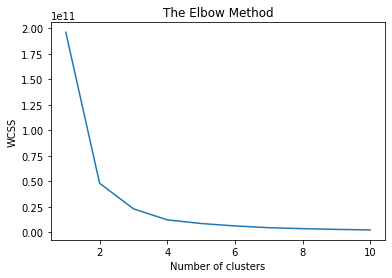

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clust)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clust)
print(y_kmeans)

[0 2 2 ... 2 2 3]


### Visualising the clusters

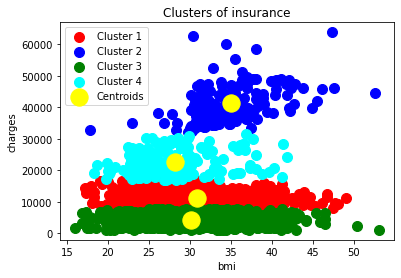

In [ ]:
plt.scatter(clust[y_kmeans == 0, 0], clust[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(clust[y_kmeans == 1, 0], clust[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(clust[y_kmeans == 2, 0], clust[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(clust[y_kmeans == 3, 0], clust[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of insurance')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend()
plt.show()

###**Conclusion**: for a perticular interval of charges quantity there are same clusters for all bmi

## Age vs charges clustering

### Using the elbow method to find the optimal number of clusters

In [ ]:
clust=dataset.iloc[:,[0,6]].values

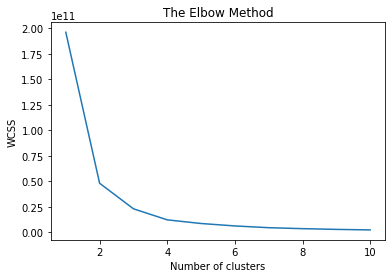

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clust)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clust)

### Visualising the clusters

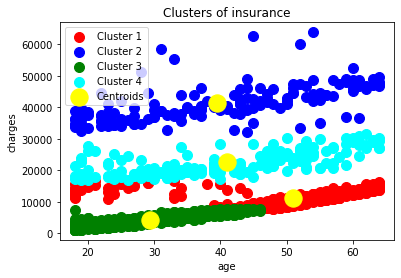

In [ ]:
plt.scatter(clust[y_kmeans == 0, 0], clust[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(clust[y_kmeans == 1, 0], clust[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(clust[y_kmeans == 2, 0], clust[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(clust[y_kmeans == 3, 0], clust[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of insurance')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.show()

###**Conclusion**: for higher charges, for a perticular interval of charges quantity, there are same clusters for all ages. But in case of lower charges, there are two clusters one cluster is upto approximately 47 years and another one is greater than 47 years

## Children vs charges clustering

### Using the elbow method to find the optimal number of clusters


In [ ]:
clust=dataset.iloc[:,[3,6]].values

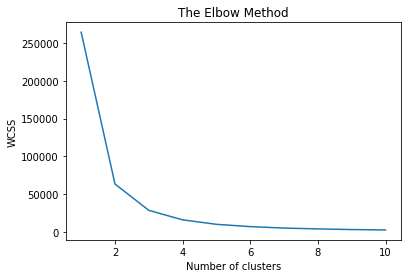

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clust)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clust)

### Visualising the clusters

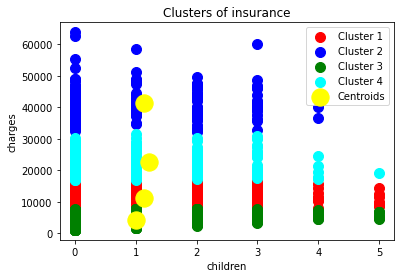

In [ ]:
plt.scatter(clust[y_kmeans == 0, 0], clust[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(clust[y_kmeans == 1, 0], clust[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(clust[y_kmeans == 2, 0], clust[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(clust[y_kmeans == 3, 0], clust[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of insurance')
plt.xlabel('children')
plt.ylabel('charges')
plt.legend()
plt.show()

## **Checking of Hierarchical clustering for this dataset (is it suitable or not for this dataset)**

###Dendogram to find the optimal number of clusters

In [ ]:
clust=dataset.iloc[:,[3,6]].values

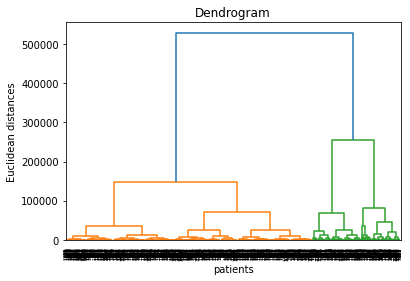

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(clust, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('patients')
plt.ylabel('Euclidean distances')
plt.show()

### Trainning the Hierarchical clustering model on the data set children vs charges

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(clust)

###**Conclusion**: The optimal number of clusters calculated from the Hierarchical clustering is 2 but that is calculated fron KMeans is 4.but the number of clusters is 2 is not the optimal for this dataset. So we can say from the above calculation that the KMeans clustering is better than Hierarchical clustering for a large dataset.

##Age vs smoker clustering

In [ ]:
clust=dataset.iloc[:,[0,4]].values

### Encoding the categorical column smoker

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
clust[:,1]=le.fit_transform(clust[:,1])
print(clust[:,1])

[1 0 0 ... 0 0 1]


### Using the elbow method to find the optimal number of clusters 


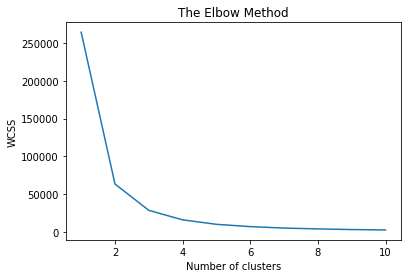

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clust)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clust)

### Visualising the clusters

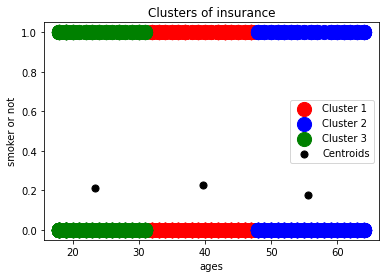

In [ ]:
plt.scatter(clust[y_kmeans == 0, 0], clust[y_kmeans == 0, 1], s = 200, c = 'red', label = 'Cluster 1')
plt.scatter(clust[y_kmeans == 1, 0], clust[y_kmeans == 1, 1], s = 200, c = 'blue', label = 'Cluster 2')
plt.scatter(clust[y_kmeans == 2, 0], clust[y_kmeans == 2, 1], s = 200, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters of insurance')
plt.xlabel('ages')
plt.ylabel('smoker or not')
plt.legend()
plt.show()

###**conclusion**: the number of smokers at the age of approximately 32 to 48 is the greatest as the centroid of the cluster is at the heighest position along smoker or not axis among the all. and the number of smokers above 48 years old is the least among all. 